In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import biosignalsnotebooks as bsnb

import numpy as np

In [ ]:
# Loading Data to compare
# df_new_MVC = pd.read_csv('5362627/AB194/AB194/MVC/AB194_MVC.csv')
# df_new_RAW = pd.read_csv('../5362627/AB188/AB188/Raw/AB188_Circuit_002_raw.csv')
# df_old_RAW_left = pd.read_csv("C:/Users/firas/OneDrive/Bureau/Thesis/2 Esteban Datasets/Prestudy/Redona/2021-12-15/Trial left leg_1/Trial left leg_1.csv", sep=";", skiprows=5, decimal=",")
# df_old_RAW_right = pd.read_csv("C:/Users/firas/OneDrive/Bureau/Thesis/2 Esteban Datasets/Prestudy/Redona/2021-12-15/Trial right leg_1/Trial right leg_1.csv", sep=";", skiprows=5, decimal=",")

# 1st Part: MCV vs RAW data

In [ ]:
# # Plotting MVC Processed sEMG signal for TA (new dataset)
# plt.figure(figsize=(10, 6))
# plt.title('New Dataset: MVC Processed sEMG Signal For R&L TA')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(df_new_MVC.index/1000, df_new_MVC['RTA'], label='R_TA')
# plt.plot(df_new_MVC.index/1000, df_new_MVC['LTA'], label='L_TA')
# plt.legend()
# # plt.show()
# 
# # Plotting RAW sEMG signal for TA (our dataset)
# plt.figure(figsize=(10, 6))
# plt.title('Our Dataset: RAW sEMG Signal For R&L TA (Sample of 35s)') # first 35 seconds only
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(np.arange(0,35000)/1000, df_old_RAW_right.iloc[:35000][' EMG 7 (1000Hz)'], label='R_TA')
# plt.plot(np.arange(0,35000)/1000, df_old_RAW_left.iloc[:35000][' EMG 7 (1000Hz)'], label='L_TA')
# plt.legend()
# # plt.show()
# 
# # Plotting RAW sEMG signal for TA (new dataset)
# plt.figure(figsize=(10, 6))
# plt.title('New Dataset: RAW sEMG Signal For R&L TA')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_TA'], label='R_TA')
# plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_TA'], label='L_TA')
# plt.legend()
# plt.show()

Theory: 
- Use the MCV dataset? We only have 1 recording containing 3 tries per subject, meaning we have a total of 30 tries.
- Different scale between our recordings and their recording *amplitude wise*!
- Our recordings are about 10 minutes long but theirs are 37s or 26s long depending on the circuit. 
    ==> Fuse their recordings? about 25 minutes per subject ?   

# 2nd Part: Raw Data? 

In [7]:
def drawing_modes():
    modes = ["Sitting", "Level Ground Waking", "Ramp Ascent", "Ramp Descent", "Stair Ascent", "Stair Descent", "Standing"]
    colors=["blue", "black", "yellow", "magenta", "green", "cyan", "red"]
    # Find the indices where the mode changes
    mode_changes = df_new_RAW['Mode'].diff().ne(0)
    # Create a new DataFrame with the start and end indices of each interval
    intervals = pd.DataFrame({
        'Start': df_new_RAW.index[mode_changes].tolist(),
        'End': df_new_RAW.index[mode_changes.shift(-1, fill_value=True)].tolist(),
        'Mode' : df_new_RAW['Mode'][mode_changes]
    })
    legend_labels = {}
    for _, row in intervals.iterrows():
        start_time = row['Start'] / 1000
        end_time = row['End'] / 1000
        mode_index = int(row['Mode'])  # Convert mode to integer index
        label = modes[mode_index]
        if label not in legend_labels:  # Check if label already exists in dictionary
            legend_labels[label] = colors[mode_index]  # Add label and color to dictionary
            plt.axvspan(start_time, end_time, color=colors[mode_index], alpha=0.3, label=label)
        else:
            plt.axvspan(start_time, end_time, color=colors[mode_index], alpha=0.3)
    
    # Generate legend from unique labels and colors dictionary
    plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for label, color in legend_labels.items()], 
               labels=legend_labels.keys())

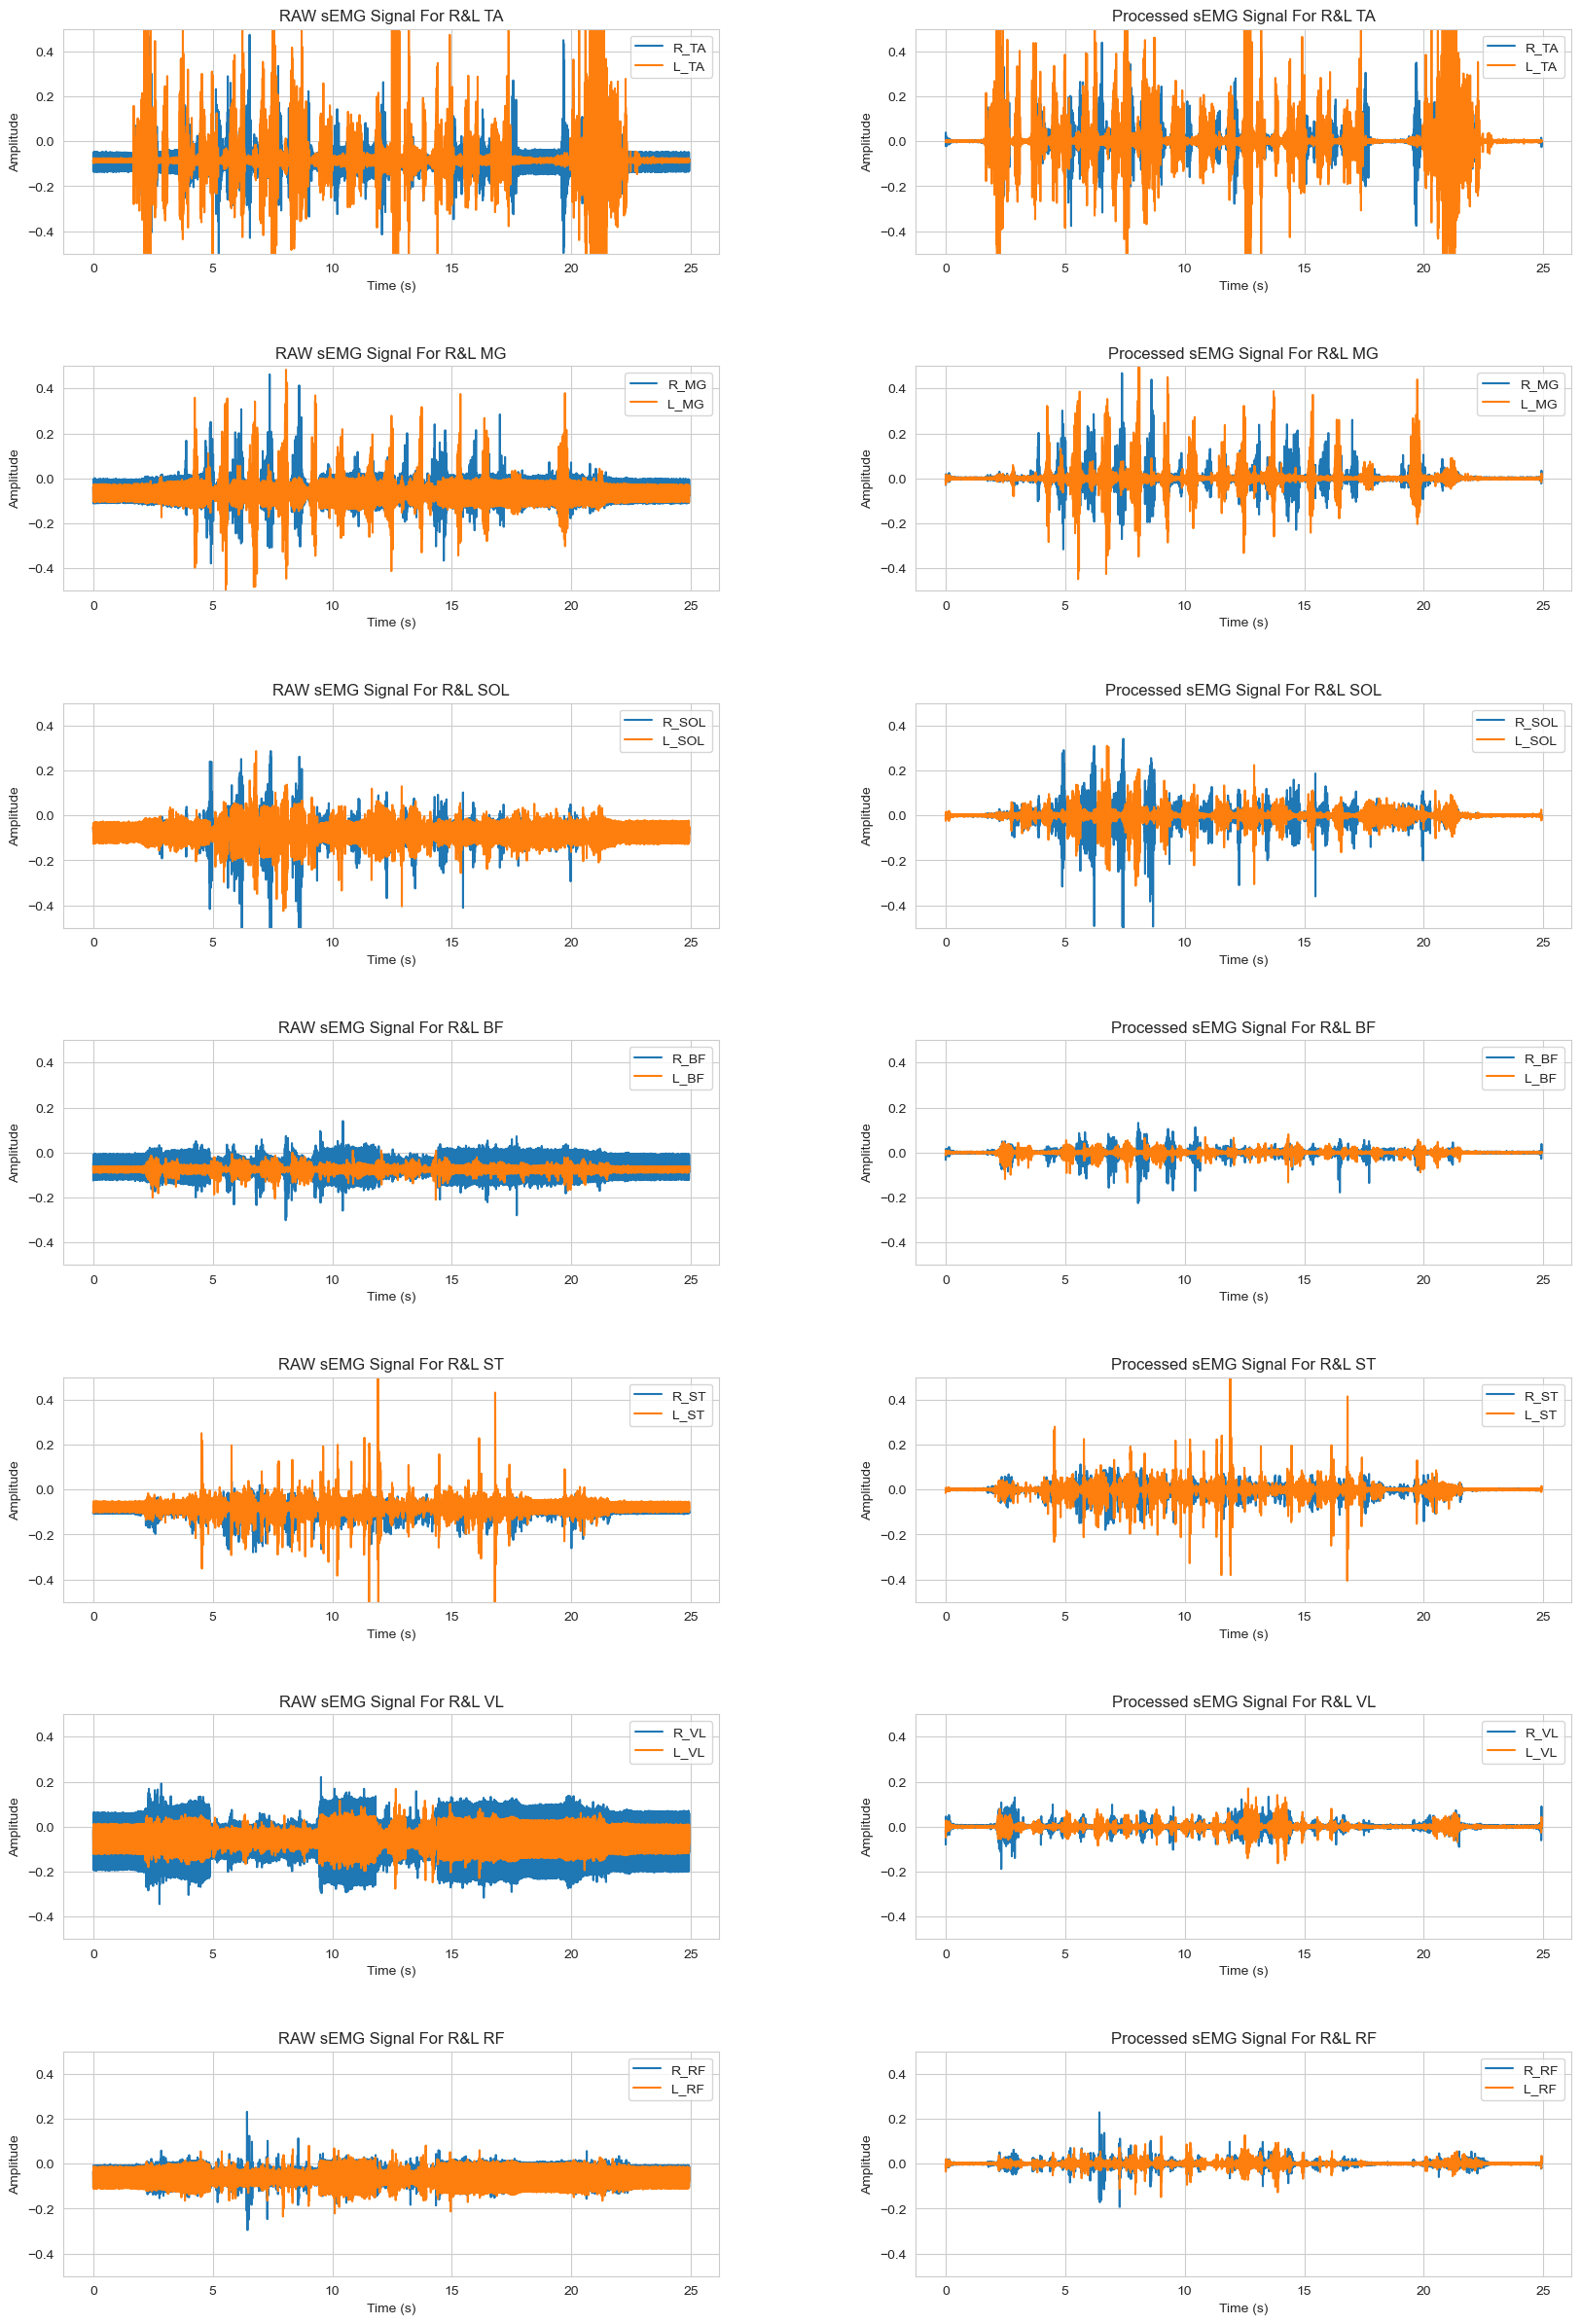

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def plot():
    # Define muscle groups for easier management
    muscle_groups = ['TA', 'MG', 'SOL', 'BF', 'ST', 'VL', 'RF']
    
    # Create a large figure to accommodate all subplots
    fig, axes = plt.subplots(nrows=len(muscle_groups), ncols=2, figsize=(20, 30))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    
    for i, muscle in enumerate(muscle_groups):
        # Plotting RAW sEMG signal
        axes[i, 0].set_title(f'RAW sEMG Signal For R&L {muscle}')
        axes[i, 0].set_xlabel('Time (s)')
        axes[i, 0].set_ylabel('Amplitude')
        axes[i, 0].plot(df_new_RAW.index/1000, df_new_RAW[f'Right_{muscle}'], label=f'R_{muscle}')
        axes[i, 0].plot(df_new_RAW.index/1000, df_new_RAW[f'Left_{muscle}'], label=f'L_{muscle}')
        axes[i, 0].set_ylim([-0.5, 0.5])  # Corrected here
        axes[i, 0].legend()
        
        # Plotting PROCESSED sEMG signal
        axes[i, 1].set_title(f'Processed sEMG Signal For R&L {muscle}')
        axes[i, 1].set_xlabel('Time (s)')
        axes[i, 1].set_ylabel('Amplitude')
        axes[i, 1].plot(df_new_proc.index/1000, df_new_proc[f'Right_{muscle}'], label=f'R_{muscle}')
        axes[i, 1].plot(df_new_proc.index/1000, df_new_proc[f'Left_{muscle}'], label=f'L_{muscle}')
        axes[i, 1].set_ylim([-0.5, 0.5])  # Corrected here
        axes[i, 1].legend()

    plt.show()

# Load data for trial
trial = 8  # Ensuring the trial number matches the desired data
df_new_RAW = pd.read_csv(f'../5362627/AB192/AB192/Raw/AB192_Circuit_00{trial}_raw.csv')
df_new_proc = pd.read_csv(f'../5362627/AB192/AB192/Processed/AB192_Circuit_00{trial}_post.csv')

plot()


In [27]:
detected_bursts_TA[0][0]

1.4950679885397244

In [55]:
# Saving the detected bursts for every muscle 
sr = 1000 # sample rate = 1000Hz
sl = 20 # smooth level (Size of sliding window used during the moving average process) # Empirical
th = 10 # threshold (To cover activation)

trial = 45
df_new_RAW = pd.read_csv(f'../5362627/AB192/AB192/Raw/AB192_Circuit_0{trial}_raw.csv')

detected_bursts_TA = bsnb.detect_emg_activations(emg_signal = df_new_RAW['Left_TA'], sample_rate = sr, smooth_level=sl, threshold_level=th, time_units=True, device="CH0", plot_result= False)
print("")


<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'sEMG Intensity (V)')

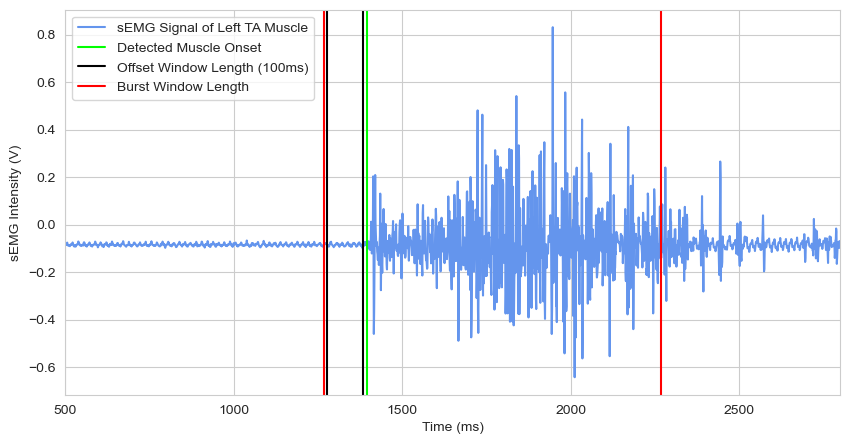

In [57]:
# Visualising the EMG Burst Detection for TA with offset for Subject_156
duration = 2800
shift = 500
number_bursts_to_plot = 1

plt.rcParams["figure.figsize"] = (10,5)
fig = plt.figure()

plt.plot(df_new_RAW["Left_TA"][:duration], color="cornflowerblue", label="sEMG Signal of Left TA Muscle")
plt.grid()
for i in range(number_bursts_to_plot): # Plot first N bursts
    plt.axvline(detected_bursts_TA[0][i]*1000-100, color="Lime", label="Detected Muscle Onset") # Detected Onset
    
    plt.axvline(detected_bursts_TA[0][i]*1000-110, color="Black", label="Offset Window Length (100ms)") # Offset Window Length End
    plt.axvline(detected_bursts_TA[0][i]*1000-218, color="black") # Offset Window Length Start

    plt.axvline(detected_bursts_TA[0][i]*1000-226, color="Red", label="Burst Window Length") # Burst Window Length Start
    plt.axvline(detected_bursts_TA[0][i]*1000+774, color="Red") # Burst Window Length Start


plt.legend(loc="upper left")
plt.xlim(shift, duration)
plt.grid()
plt.xlabel("Time (ms)", fontsize=10)
plt.ylabel("sEMG Intensity (V)", fontsize=10)

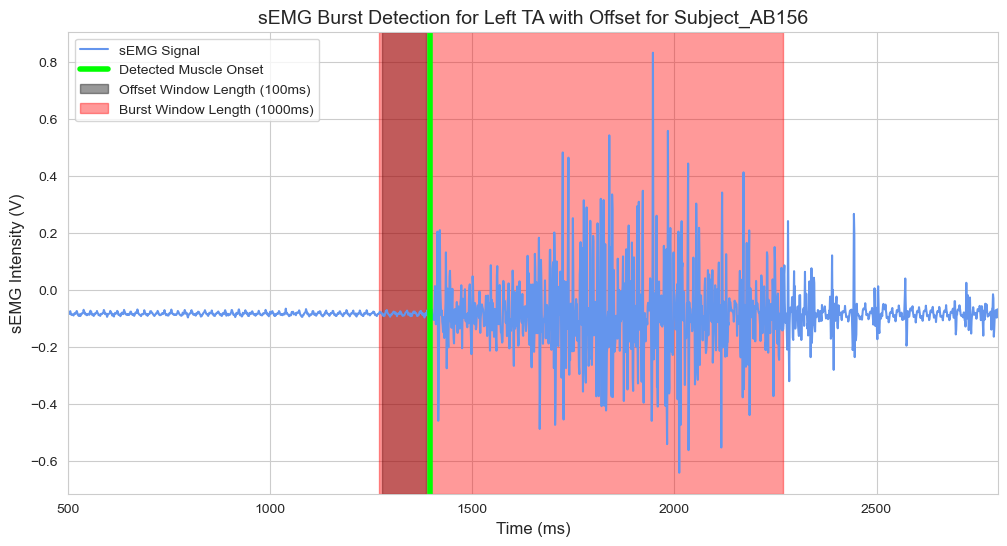

In [75]:
import matplotlib.pyplot as plt

# Visualising the EMG Burst Detection for TA with offset for Subject_156
duration = 2800
shift = 500
number_bursts_to_plot = 1

plt.rcParams["figure.figsize"] = (12, 6)  # Slightly larger figure size for better readability
fig, ax = plt.subplots()

# Plotting the sEMG signal
ax.plot(df_new_RAW["Left_TA"][:duration], color="cornflowerblue", label="sEMG Signal")

# Adding grid for better visualization
ax.grid(True)

# Plotting the burst detections
for i in range(number_bursts_to_plot):  # Plot first N bursts
    onset = detected_bursts_TA[0][i] * 1000
    
    # Detected Onset
    ax.axvline(onset - 100, color="lime", linewidth = 4, label="Detected Muscle Onset")
    
    # Offset Window Length
    ax.axvspan(onset - 218, onset - 110, color="black", alpha=0.4, label="Offset Window Length (100ms)")
    
    # Burst Window Length
    ax.axvspan(onset - 226, onset + 774, color="red", alpha=0.4, label="Burst Window Length (1000ms)")

# Adding labels, title, and legend
ax.legend(loc="upper left", fontsize=10)
ax.set_xlim(shift, duration)
ax.set_xlabel("Time (ms)", fontsize=12)
ax.set_ylabel("sEMG Intensity (V)", fontsize=12)
ax.set_title("sEMG Burst Detection for Left TA with Offset for Subject_AB156", fontsize=14)

plt.show()

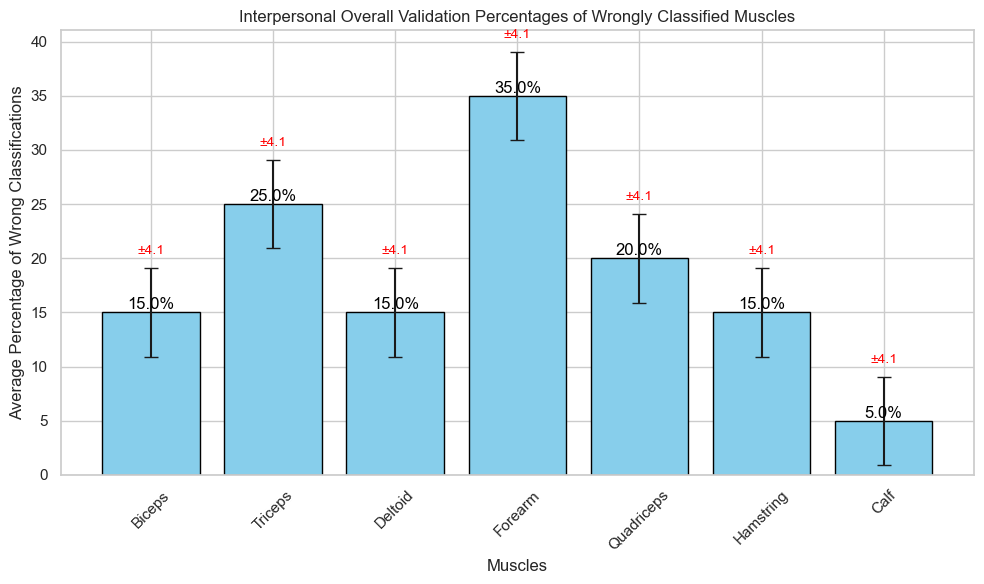

In [76]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Dummy muscle names for illustration
muscles = ['Biceps', 'Triceps', 'Deltoid', 'Forearm', 'Quadriceps', 'Hamstring', 'Calf']

def plot_average_wrong_classification_percentages(all_percentages):
    # Convert list of arrays into a single 2D array for easier manipulation
    all_percentages = np.array(all_percentages)

    # Calculate the average and standard deviation of each muscle's wrong classification percentage
    average_percentages = np.mean(all_percentages, axis=0)
    std_percentages = np.std(all_percentages, axis=0)
    title_avg = "Interpersonal Overall Validation Percentages of Wrongly Classified Muscles"

    # Setting the plotting area and style
    sn.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Bar plot for average percentages with error bars for standard deviation
    bars_avg = plt.bar(muscles, average_percentages, yerr=std_percentages, capsize=5, color='skyblue', edgecolor='black')
    plt.xlabel('Muscles')
    plt.ylabel('Average Percentage of Wrong Classifications')
    plt.title(title_avg)
    plt.xticks(rotation=45)

    # Adding text labels for average percentages
    for p, avg, std in zip(bars_avg, average_percentages, std_percentages):
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height, f'{avg:.1f}%', ha='center', va='bottom', fontsize=12, color='black')
        plt.text(p.get_x() + p.get_width() / 2., height + std + 1, f'±{std:.1f}', ha='center', va='bottom', fontsize=10, color='red')

    plt.tight_layout()
    plt.savefig("Interpersonal_Overall_Validation_Percentages_of_Wrongly_Classified_Muscles.png")
    plt.show()

# Example usage with dummy data
all_percentages = [
    [10, 20, 15, 30, 25, 20, 10],
    [15, 25, 10, 35, 20, 15, 5],
    [20, 30, 20, 40, 15, 10, 0],
]

plot_average_wrong_classification_percentages(all_percentages)


In [11]:

trial = 45
df_new_RAW = pd.read_csv(f'../5362627/AB192/AB192/Raw/AB192_Circuit_0{trial}_raw.csv')

# Saving the detected bursts for every muscle 
sr = 1000 # sample rate = 1000Hz
sl = 20 # smooth level (Size of sliding window used during the moving average process) # Empirical
th = 10 # threshold (To cover activation)

# # Visualising the EMG Burst Detection for SOL
plot_duration = 40000 # time in milliseconds
bsnb.detect_emg_activations(emg_signal = df_new_RAW['Left_TA'], sample_rate = sr, smooth_level=sl, threshold_level=th, time_units=True, device="CH0", plot_result= True)
print("")

In [ ]:
# For Comparison! 
plt.figure(figsize=(20, 30))

for i, muscle in enumerate(['TA', 'MG', 'SOL', 'BF', 'ST', 'VL', 'RF']):
    plt.subplot(4, 2, i+1) 
    plt.title(f'New Dataset: RAW sEMG Signal For R&L {muscle}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.plot(df_new_RAW.index/1000, df_new_RAW[f'Right_{muscle}'], label=f'R_{muscle}')
    plt.plot(df_new_RAW.index/1000, df_new_RAW[f'Left_{muscle}'], label=f'L_{muscle}')
    drawing_modes()
    plt.legend()

plt.tight_layout()  
plt.show()

 Remarks? 
- Use the RAW dataset? we can extract the moment the subject stands up ? (proven to be wrong) 
- Study at which stage (Modes 1 --> 6) of the circuit every muscle is most active and then extract it ? (very difficult and unclear?) 
- Huge spikes ? artifacts ? should be capped to a max value ? 
- different scales and magnitudes of the signals! some signals max at 0.2 and some exceed 1.0!
- is the right-leg left-leg movement useful? needs to be taken into account anyway!



## Circuit 2 maybe ? 

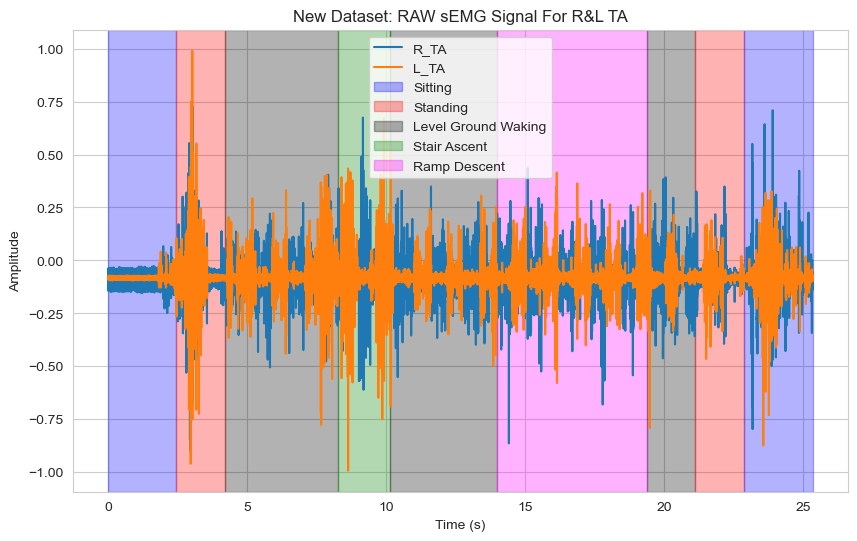

In [9]:
df_new_RAW = pd.read_csv(f'../5362627/AB194/AB194/Raw/AB194_Circuit_007_raw.csv')
# Plotting RAW sEMG signal for TA (new dataset)
plt.figure(figsize=(10, 6))
plt.title('New Dataset: RAW sEMG Signal For R&L TA')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_TA'], label='R_TA')
plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_TA'], label='L_TA')
drawing_modes()
plt.legend()
# plt.show()
# 
# plt.figure(figsize=(10, 6))
# plt.title('New Dataset: RAW sEMG Signal For R&L MG')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_MG'], label='R_MG')
# plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_MG'], label='L_MG')
# drawing_modes()
# plt.legend()
# # plt.show()
# 
# plt.figure(figsize=(10, 6))
# plt.title('New Dataset: RAW sEMG Signal For R&L SOL')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_SOL'], label='R_SOL')
# plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_SOL'], label='L_SOL')
# drawing_modes()
# plt.legend()
# # plt.show()
# 
# plt.figure(figsize=(10, 6))
# plt.title('New Dataset: RAW sEMG Signal For R&L BF')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_BF'], label='R_BF')
# plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_BF'], label='L_BF')
# drawing_modes()
# plt.legend()
# # plt.show()
# 
# plt.figure(figsize=(10, 6))
# plt.title('New Dataset: RAW sEMG Signal For R&L ST')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_ST'], label='R_ST')
# plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_ST'], label='L_ST')
# drawing_modes()
# plt.legend()
# # plt.show()
# 
# plt.figure(figsize=(10, 6))
# plt.title('New Dataset: RAW sEMG Signal For R&L VL')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_VL'], label='R_VL')
# plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_VL'], label='L_VL')
# drawing_modes()
# plt.legend()
# # plt.show()
# 
# plt.figure(figsize=(10, 6))
# plt.title('New Dataset: RAW sEMG Signal For R&L RF')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.plot(df_new_RAW.index/1000, df_new_RAW['Right_RF'], label='R_RF')
# plt.plot(df_new_RAW.index/1000,  df_new_RAW['Left_RF'], label='L_RF')
# drawing_modes()
# plt.legend()
plt.show()

contraction by next week 
have the files by the oen after 
by the end of March to run the modelllll for the first time on this data at leasttttttt!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! even just run it 
best in two weekssss !!!!!!!

additional datasets can be added later as improvements 
